## Import Libraries

In [97]:
import pandas as pd
import numpy as np
import networkx as nx
from scipy.stats import pearsonr   
from scipy.stats import spearmanr   
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import seaborn as sns

In [98]:
df = pd.read_csv('mdata.csv')
print(df.head())

   ID  resident_status  education_2003_revision  education_reporting_flag  \
0   1                1                      3.0                         1   
1   2                1                      6.0                         1   
2   3                1                      3.0                         1   
3   4                1                      3.0                         1   
4   5                1                      5.0                         1   

   month_of_death sex  detail_age_type  detail_age  age_recode_52  \
0               1   M                1          84             42   
1               1   M                1          70             40   
2               1   F                1          91             44   
3               1   F                1          40             34   
4               1   F                1          89             43   

   age_recode_27  ...  39_cause_recode  number_of_entity_axis_conditions  \
0             22  ...               22        

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   ID                                   1048575 non-null  int64  
 1   resident_status                      1048575 non-null  int64  
 2   education_2003_revision              997705 non-null   float64
 3   education_reporting_flag             1048575 non-null  int64  
 4   month_of_death                       1048575 non-null  int64  
 5   sex                                  1048575 non-null  object 
 6   detail_age_type                      1048575 non-null  int64  
 7   detail_age                           1048575 non-null  int64  
 8   age_recode_52                        1048575 non-null  int64  
 9   age_recode_27                        1048575 non-null  int64  
 10  age_recode_12                        1048575 non-null  int64  
 11

In [100]:
df.fillna(0,inplace=True)
df

,ID,resident_status,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,age_recode_52,age_recode_27,...,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,number_of_record_axis_conditions,record_condition_1,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
0,1,1,3.0,1,1,M,1,84,42,22,...,22,2,11I500,2,I500,1,1,1,100,6
1,2,1,6.0,1,1,M,1,70,40,20,...,8,8,11I469,7,C349,1,1,1,100,6
2,3,1,3.0,1,1,F,1,91,44,24,...,17,1,11G309,1,G309,1,1,1,100,6
3,4,1,3.0,1,1,F,1,40,34,14,...,41,6,11T71,5,X91,3,2,3,100,8
4,5,1,5.0,1,1,F,1,89,43,23,...,21,3,11I250,3,I250,1,1,1,100,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048571,1,5.0,1,12,M,1,75,41,21,...,6,1,11C189,1,C189,1,1,1,100,6
1048571,1048572,1,3.0,1,11,F,1,62,38,18,...,5,1,11C169,1,C169,2,3,2,100,7
1048572,1048573,1,1.0,1,12,F,1,95,45,25,...,31,4,11R092,3,N185,1,1,1,100,6
1048573,1048574,1,1.0,1,12,M,1,86,43,23,...,22,4,11I469,4,I500,1,1,1,100,6


In [101]:
df_sub = df.sample(n=24)
df_sub

,ID,resident_status,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,age_recode_52,age_recode_27,...,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,number_of_record_axis_conditions,record_condition_1,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
812730,812731,1,3.0,1,1,F,1,75,41,21,...,21,3,11I219,3,I219,1,1,1,100,6
398605,398606,1,3.0,1,12,F,1,79,41,21,...,15,2,11C796,3,C80,2,3,2,100,7
469479,469480,3,3.0,1,2,M,1,80,42,22,...,38,7,11I469,7,V892,2,3,2,100,7
617193,617194,1,1.0,1,9,F,1,93,44,24,...,36,1,11R54,1,R54,1,1,1,100,6
565126,565127,1,6.0,1,5,M,1,59,37,17,...,21,2,11I250,2,I250,1,1,1,100,6
7640,7641,2,0.0,0,2,M,1,90,44,24,...,27,1,11J189,1,J189,1,1,1,100,6
452929,452930,1,9.0,1,6,F,1,95,45,25,...,37,2,11A419,2,K631,1,1,1,100,6
90551,90552,1,6.0,1,1,F,1,83,42,22,...,37,3,11I469,3,J690,1,1,1,100,6
96086,96087,1,3.0,1,3,M,1,50,36,16,...,39,3,11T913,3,Y850,3,2,3,100,8
653226,653227,1,3.0,1,11,M,1,28,31,11,...,39,3,11T510,3,X45,2,3,2,100,7


In [102]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 812730 to 141393
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   24 non-null     int64  
 1   resident_status                      24 non-null     int64  
 2   education_2003_revision              24 non-null     float64
 3   education_reporting_flag             24 non-null     int64  
 4   month_of_death                       24 non-null     int64  
 5   sex                                  24 non-null     object 
 6   detail_age_type                      24 non-null     int64  
 7   detail_age                           24 non-null     int64  
 8   age_recode_52                        24 non-null     int64  
 9   age_recode_27                        24 non-null     int64  
 10  age_recode_12                        24 non-null     int64  
 11  place_of_death_and_decede

In [103]:
print(df_sub['ID'].dtype)
print(df_sub['sex'].dtype)
print(df_sub.iloc[:, 1:].dtypes)

int64
object
resident_status                          int64
education_2003_revision                float64
education_reporting_flag                 int64
month_of_death                           int64
sex                                     object
detail_age_type                          int64
detail_age                               int64
age_recode_52                            int64
age_recode_27                            int64
age_recode_12                            int64
place_of_death_and_decedents_status      int64
marital_status                          object
day_of_week_of_death                     int64
current_data_year                        int64
injury_at_work                          object
manner_of_death                        float64
method_of_disposition                   object
autopsy                                 object
icd_code_10th_revision                  object
358_cause_recode                         int64
113_cause_recode                         int64


In [104]:
df['sex'].replace(['M', 'F'], [1, 2], inplace=True)
df['marital_status'].replace(['D','M','S','U','W'],[1,2,3,4,5],inplace=True)

In [105]:
df_sub['sex'].replace(['M', 'F'], [1, 2], inplace=True)
df_sub['marital_status'].replace(['D','M','S','U','W'],[1,2,3,4,5],inplace=True)

In [106]:
corr_matrix_sub = df_sub.corr(method='pearson')
G_sub = nx.Graph()

In [107]:
corr_matrix = df.corr(method='pearson')
G = nx.Graph()

In [108]:
df = df.dropna()

In [109]:
df_sub = df_sub.dropna()

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   ID                                   1048575 non-null  int64  
 1   resident_status                      1048575 non-null  int64  
 2   education_2003_revision              1048575 non-null  float64
 3   education_reporting_flag             1048575 non-null  int64  
 4   month_of_death                       1048575 non-null  int64  
 5   sex                                  1048575 non-null  int64  
 6   detail_age_type                      1048575 non-null  int64  
 7   detail_age                           1048575 non-null  int64  
 8   age_recode_52                        1048575 non-null  int64  
 9   age_recode_27                        1048575 non-null  int64  
 10  age_recode_12                        1048575 non-null  int64  
 11

In [126]:
# Step 4: Iterate over all pairs of columns and add edges for high correlations
threshold = 0.1
corr_matrix
for col1 in df.columns:
    if col1 not in corr_matrix.columns:
        continue  # skip this column if it's not in the correlation matrix
    for col2 in df.columns:
        if col2 not in corr_matrix.columns:
            continue  # skip this column if it's not in the correlation matrix
        if corr_matrix.loc[col1, col2] > threshold:
            G.add_edge(col1, col2, weight=corr_matrix.loc[col1, col2])


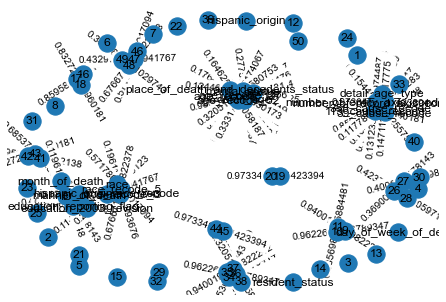

In [127]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [128]:
G = nx.convert_node_labels_to_integers(G, first_label=1)

In [129]:
nodes = G.nodes()
print("Nodes:", nodes)

Nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


In [130]:
edges = G.edges()
print("\nEdges:", edges)


Edges: [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (9, 10), (9, 11), (10, 10), (10, 11), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (16, 17), (17, 17), (17, 18), (18, 18), (19, 19), (19, 20), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (26, 27), (26, 28), (27, 30), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (34, 35), (34, 36), (34, 37), (35, 35), (35, 36), (35, 37), (36, 36), (36, 37), (36, 38), (37, 37), (37, 38), (38, 38), (39, 39), (40, 40), (41, 41), (41, 42), (41, 43), (42, 42), (42, 43), (43, 43), (44, 44), (44, 45), (45, 45), (46, 46), (46, 47), (47, 48), (47, 47), (47, 49), (48, 48), (48, 49), (49, 49), (50, 50), (51, 51), (51, 52), (51, 53), (51, 54), (52, 56), (52, 52), (53, 53), (54, 54), (54, 57), (55, 55), (56, 56), (56, 57), (57, 72), (57, 73), (57, 74), (57, 57), (58, 58), (58, 59), (58, 60), (58, 61), (58, 62), (58, 63), (59, 59), (59, 60), (59, 61), (59, 62), (

In [131]:
print(nx.info(G))

print('Node Count:', G.number_of_nodes())
print('Edge Count:', G.number_of_edges())

Name: 
Type: Graph
Number of nodes: 75
Number of edges: 144
Average degree:   3.8400
Node Count: 75
Edge Count: 144


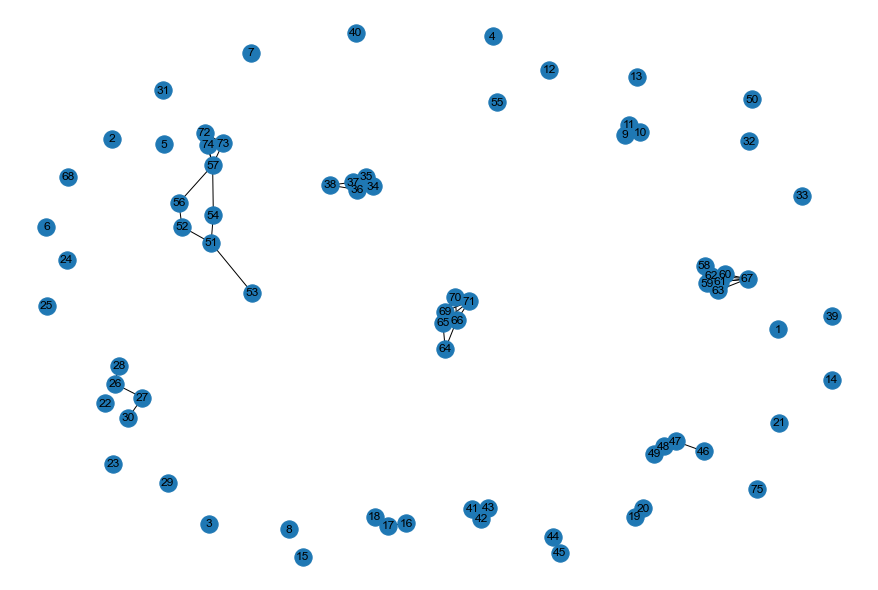

In [132]:
# Draw the graph
plt.figure(figsize=(12,8))

nx.draw(G, with_labels=True)

In [133]:
#Connected graphs
#G.remove_node(20)
nx.is_connected(G)

False

In [134]:
# Available layouts for Plot
layouts = [x for x in nx.__dir__() if x.endswith('_layout')]
layouts

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout']

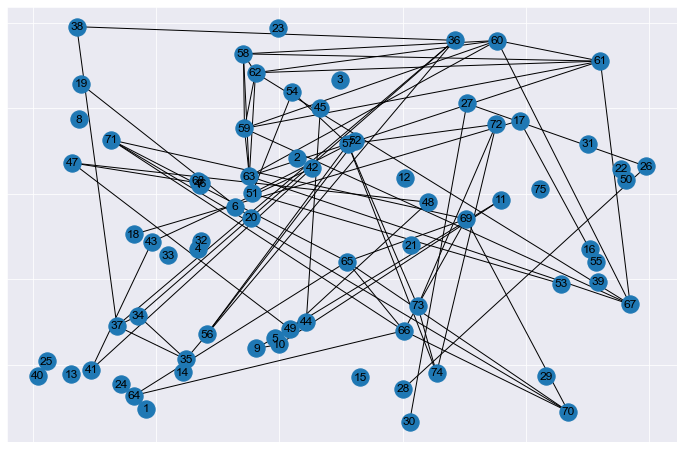

In [135]:
#circular_layout
plt.figure(figsize=(12,8))

pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

### Network measurements:

1. Clustering coefficient
2. Transitivity
3. shortest path length
4. average shortest path length
5. diameter
6. Eccentricity
7. Radius
8. Degree Centrality
9. Closeness Centrality
10. Betweenness Centrality
11. Degree Distribution
12. Compare measurements

#### Clustering coefficient
Measures the degree to which nodes in a network tendo to 'cluster' or form triangles

In [136]:
G.edges()

EdgeView([(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (9, 10), (9, 11), (10, 10), (10, 11), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (16, 17), (17, 17), (17, 18), (18, 18), (19, 19), (19, 20), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (26, 27), (26, 28), (27, 30), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (34, 35), (34, 36), (34, 37), (35, 35), (35, 36), (35, 37), (36, 36), (36, 37), (36, 38), (37, 37), (37, 38), (38, 38), (39, 39), (40, 40), (41, 41), (41, 42), (41, 43), (42, 42), (42, 43), (43, 43), (44, 44), (44, 45), (45, 45), (46, 46), (46, 47), (47, 48), (47, 47), (47, 49), (48, 48), (48, 49), (49, 49), (50, 50), (51, 51), (51, 52), (51, 53), (51, 54), (52, 56), (52, 52), (53, 53), (54, 54), (54, 57), (55, 55), (56, 56), (56, 57), (57, 72), (57, 73), (57, 74), (57, 57), (58, 58), (58, 59), (58, 60), (58, 61), (58, 62), (58, 63), (59, 59), (59, 60), (59, 61), (59, 62), 

Local clustering coefficient:

(For nodes of degree <= 2, assume LCCoeff of 0)

In [137]:
nx.clustering(G, 1), nx.clustering(G, 14), nx.clustering(G, 10)

(0, 0, 1.0)

Global clustering coefficient:

In [138]:
nx.average_clustering(G)

0.3737777777777778

#### Transitivity
ratio of number of triangles and number of 'open triads' in a network

In [139]:
nx.transitivity(G)

0.828125

#### shortest path length

Path lenght: Number of edges between two nodes.

Distance: Least number of edges between two nodes.

In [140]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75))

In [142]:
nx.shortest_path(G, 8, 10)

NetworkXNoPath: No path between 8 and 10.

In [146]:
nx.shortest_path_length(G, 8, 17)

NetworkXNoPath: No path between 8 and 17.

#### Average shortest path length

In [147]:
nx.average_shortest_path_length(G)

NetworkXError: Graph is not connected.

#### Diameter
Maximum possible distance between two nodes

In [148]:
nx.diameter(G)

NetworkXError: Found infinite path length because the graph is not connected

#### Degree Centrality
Identifies the most importante nodes in a network

Directed network: degree
Undirected network: in-degree and/or out-degree
Directed Network:

Centrailty(node) = degree(v) / (|all nodes| - 1)

0 <= Centrality <= 1

In [149]:
nx.degree_centrality(G)[4]

0.02702702702702703

In [150]:
nx.degree_centrality(G)

{1: 0.02702702702702703,
 2: 0.02702702702702703,
 3: 0.02702702702702703,
 4: 0.02702702702702703,
 5: 0.02702702702702703,
 6: 0.02702702702702703,
 7: 0.02702702702702703,
 8: 0.02702702702702703,
 9: 0.05405405405405406,
 10: 0.05405405405405406,
 11: 0.05405405405405406,
 12: 0.02702702702702703,
 13: 0.02702702702702703,
 14: 0.02702702702702703,
 15: 0.02702702702702703,
 16: 0.04054054054054054,
 17: 0.05405405405405406,
 18: 0.04054054054054054,
 19: 0.04054054054054054,
 20: 0.04054054054054054,
 21: 0.02702702702702703,
 22: 0.02702702702702703,
 23: 0.02702702702702703,
 24: 0.02702702702702703,
 25: 0.02702702702702703,
 26: 0.05405405405405406,
 27: 0.05405405405405406,
 28: 0.04054054054054054,
 29: 0.02702702702702703,
 30: 0.04054054054054054,
 31: 0.02702702702702703,
 32: 0.02702702702702703,
 33: 0.02702702702702703,
 34: 0.06756756756756757,
 35: 0.06756756756756757,
 36: 0.08108108108108109,
 37: 0.08108108108108109,
 38: 0.05405405405405406,
 39: 0.02702702702702

#### Closenesse Centrality
Nodes that are important, will be close to other nodes

In [151]:
cc = nx.closeness_centrality(G)

In [152]:
cc[10]

0.02702702702702703

In [153]:
cc

{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.02702702702702703,
 10: 0.02702702702702703,
 11: 0.02702702702702703,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.018018018018018018,
 17: 0.02702702702702703,
 18: 0.018018018018018018,
 19: 0.013513513513513514,
 20: 0.013513513513513514,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.030405405405405407,
 27: 0.030405405405405407,
 28: 0.02027027027027027,
 29: 0.0,
 30: 0.02027027027027027,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.043243243243243246,
 35: 0.043243243243243246,
 36: 0.05405405405405406,
 37: 0.05405405405405406,
 38: 0.036036036036036036,
 39: 0.0,
 40: 0.0,
 41: 0.02702702702702703,
 42: 0.02702702702702703,
 43: 0.02702702702702703,
 44: 0.013513513513513514,
 45: 0.013513513513513514,
 46: 0.024324324324324326,
 47: 0.04054054054054054,
 48: 0.030405405405405407,
 49: 0.030405405405405407,
 50: 0.0,
 51: 0.05405405405405406,
 52: 0.05087440381558029,
 53: 0.03760282021151586,
 

In [154]:
nx.shortest_path_length(G, 19)

{19: 0, 20: 1}

In [155]:
sum(nx.shortest_path_length(G, 19).values())

1

#### Betweenness Centrality
A node 'n' has high Betweenness Centrality if it appears a great number of times in the shortest paths between nodes 'u' and 'v'

In [156]:
bcc = nx.betweenness_centrality(G, endpoints=False)
bcc

{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.00037023324694557573,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0007404664938911515,
 27: 0.0007404664938911515,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.00037023324694557573,
 37: 0.00037023324694557573,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0007404664938911515,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.002961865975564606,
 52: 0.0007404664938911515,
 53: 0.0,
 54: 0.002961865975564606,
 55: 0.0,
 56: 0.001480932987782303,
 57: 0.005923731951129212,
 58: 0.0,
 59: 7.404664938911516e-05,
 60: 7.404664938911516e-05,
 61: 7.404664938911516e-05,
 62: 7.404664938911516e-05,
 63: 7.404664938911516e-05,
 64: 0.0,
 65: 0.0005553498704183636,
 66: 0.0005553498704183636,
 67: 0.0,
 68: 0.0,
 69: 0

In [157]:
def maxKeyVal(x: dict):
    keys = list(x.keys())
    values = list(x.values())
    return keys[values.index(max(values))], max(list(x.values()))

def minKeyVal(x: dict):
    keys = list(x.keys())
    values = list(x.values())
    return keys[values.index(min(values))], min(list(x.values()))

In [158]:
maxKeyVal(bcc), minKeyVal(bcc)

((57, 0.005923731951129212), (1, 0.0))

#### Adjacency_matrix

In [159]:
nx.adjacency_matrix(G).todense()
#todense()=all matrix entries are stored in a 2-dimensional array.

matrix([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 1.        , 0.67667132,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.67667132, 1.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ]])

#### Add and remove an edge or node

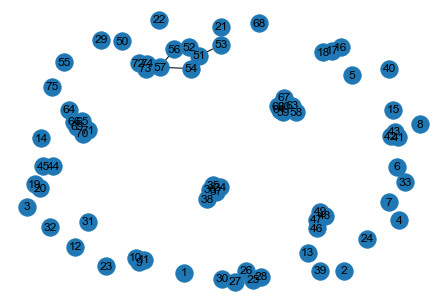

In [160]:
position_dict = nx.spring_layout(G)
nx.draw(G, pos=position_dict, with_labels=True) 

In [161]:
G.add_edge(12, 5)

In [162]:
#G.remove_edge(21, 33)

In [163]:
#G.remove_node(1)

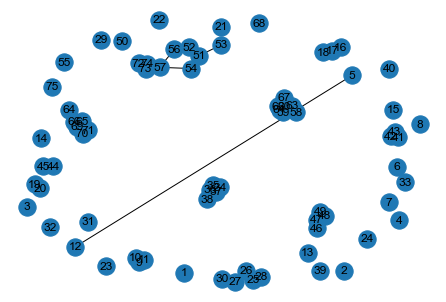

In [164]:
nx.draw(G, pos=position_dict, with_labels=True) 

In [165]:
nx.is_connected(G)

False

#### Degree Distribution
The degree distribution, P(k) of a network is the number of nodes of degree k, divided by the total number of nodes, i.e.:

P(k) = (# nodes with k-degree) / len(g.nodes())

In [166]:
G.degree()

DegreeView({1: 2, 2: 2, 3: 2, 4: 2, 5: 3, 6: 2, 7: 2, 8: 2, 9: 4, 10: 4, 11: 4, 12: 3, 13: 2, 14: 2, 15: 2, 16: 3, 17: 4, 18: 3, 19: 3, 20: 3, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 4, 27: 4, 28: 3, 29: 2, 30: 3, 31: 2, 32: 2, 33: 2, 34: 5, 35: 5, 36: 6, 37: 6, 38: 4, 39: 2, 40: 2, 41: 4, 42: 4, 43: 4, 44: 3, 45: 3, 46: 3, 47: 5, 48: 4, 49: 4, 50: 2, 51: 5, 52: 4, 53: 3, 54: 4, 55: 2, 56: 4, 57: 7, 58: 7, 59: 8, 60: 8, 61: 8, 62: 8, 63: 8, 64: 4, 65: 7, 66: 7, 67: 7, 68: 2, 69: 6, 70: 6, 71: 6, 72: 5, 73: 5, 74: 5, 75: 2})

In [167]:
# store degree sequences of a graph list in a pandas data frame
df_degree = pd.DataFrame({"Nodes": dict(G.degree()).keys(), "Degrees": dict(G.degree()).values()})

df_degree.head(10)

,Nodes,Degrees
0,1,2
1,2,2
2,3,2
3,4,2
4,5,3
5,6,2
6,7,2
7,8,2
8,9,4
9,10,4


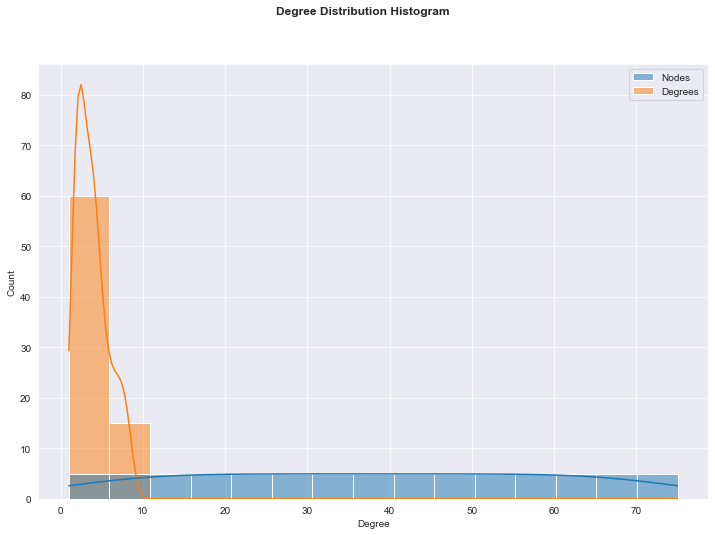

In [168]:
plt.figure(figsize=(12, 8))

sns.histplot(data=df_degree,  bins=15, kde=True)
#kernel density estimate (KDE) on the histogram,
#which is a smooth estimate of the probability density function underlying the histogram.
plt.xlabel('Degree')
# plt.legend()
suptitle = plt.suptitle('Degree Distribution Histogram',fontweight ="bold")
plt.show()

### All together

In [169]:
# Create a dictionary to store the  measurements for each node
measurements = {
    'Degree Centrality': nx.degree_centrality(G).values(),
    'Betweenness Centrality': nx.betweenness_centrality(G).values(),
    'Closeness Centrality': nx.closeness_centrality(G).values(),
    'Degree': [degree for node, degree in G.degree()],
    'Global clustering coefficient': nx.average_clustering(G),
}
# 'Eigenvector Centrality': nx.eigenvector_centrality(G).values(),
# Convert the dictionary to a pandas dataframe
df = pd.DataFrame(measurements)

# Display the table
df

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Degree,Global clustering coefficient
0,0.027027,0.0,0.000000,2,0.373778
1,0.027027,0.0,0.000000,2,0.373778
2,0.027027,0.0,0.000000,2,0.373778
3,0.027027,0.0,0.000000,2,0.373778
4,0.040541,0.0,0.013514,3,0.373778
...,...,...,...,...,...
70,0.081081,0.0,0.056306,6,0.373778
71,0.067568,0.0,0.050874,5,0.373778
72,0.067568,0.0,0.050874,5,0.373778
73,0.067568,0.0,0.050874,5,0.373778


In [170]:
nx.average_clustering(G)

0.3737777777777778

In [171]:
def is_complete(graph):
  n = graph.number_of_nodes()
  e = graph.number_of_edges()
  
  return (n*(n-1))/2 == e

In [172]:
df_sub

,ID,resident_status,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,age_recode_52,age_recode_27,...,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,number_of_record_axis_conditions,record_condition_1,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
812730,812731,1,3.0,1,1,2,1,75,41,21,...,21,3,11I219,3,I219,1,1,1,100,6
398605,398606,1,3.0,1,12,2,1,79,41,21,...,15,2,11C796,3,C80,2,3,2,100,7
469479,469480,3,3.0,1,2,1,1,80,42,22,...,38,7,11I469,7,V892,2,3,2,100,7
617193,617194,1,1.0,1,9,2,1,93,44,24,...,36,1,11R54,1,R54,1,1,1,100,6
565126,565127,1,6.0,1,5,1,1,59,37,17,...,21,2,11I250,2,I250,1,1,1,100,6
7640,7641,2,0.0,0,2,1,1,90,44,24,...,27,1,11J189,1,J189,1,1,1,100,6
452929,452930,1,9.0,1,6,2,1,95,45,25,...,37,2,11A419,2,K631,1,1,1,100,6
90551,90552,1,6.0,1,1,2,1,83,42,22,...,37,3,11I469,3,J690,1,1,1,100,6
96086,96087,1,3.0,1,3,1,1,50,36,16,...,39,3,11T913,3,Y850,3,2,3,100,8
653226,653227,1,3.0,1,11,1,1,28,31,11,...,39,3,11T510,3,X45,2,3,2,100,7


In [173]:
correlation_list = []
for i, index_i in tqdm(enumerate(df_sub.index, 1), total=df_sub.shape[0]):
    for j, index_j in enumerate(df_sub.index, 1):
        if i < j:
            id_i = df_sub.loc[index_i].ID
            id_j = df_sub.loc[index_j].ID
            correlation, p_value = spearmanr(df_sub.loc[index_i][1:], df_sub.loc[index_j][1:])
            correlation_list.append((id_i, id_j, correlation))

  0%|          | 0/24 [00:00<?, ?it/s]


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [79]:
# Create a graph
G1 = nx.Graph()
G1.add_nodes_from({v for v, _, _ in correlation_list})

# E-Neighborhood Graph
#v,u --> correlation > E
for v, u, c in correlation_list:
    if c >0.8:
        G1.add_edge(v, u, weight=c)
        
print(G1)
print(is_complete(G1))


True


In [80]:
# Draw the graph
def draw_net(graph):
  pos = nx.circular_layout(graph)

  edge_labels = {(u,v): f"{c:.3f}" for (u,v,c) in graph.edges(data="weight")}
  plt.figure(figsize=(15, 15))
  nx.draw(graph, pos, with_labels=True)
  nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=12, font_color="red")
  plt.show()

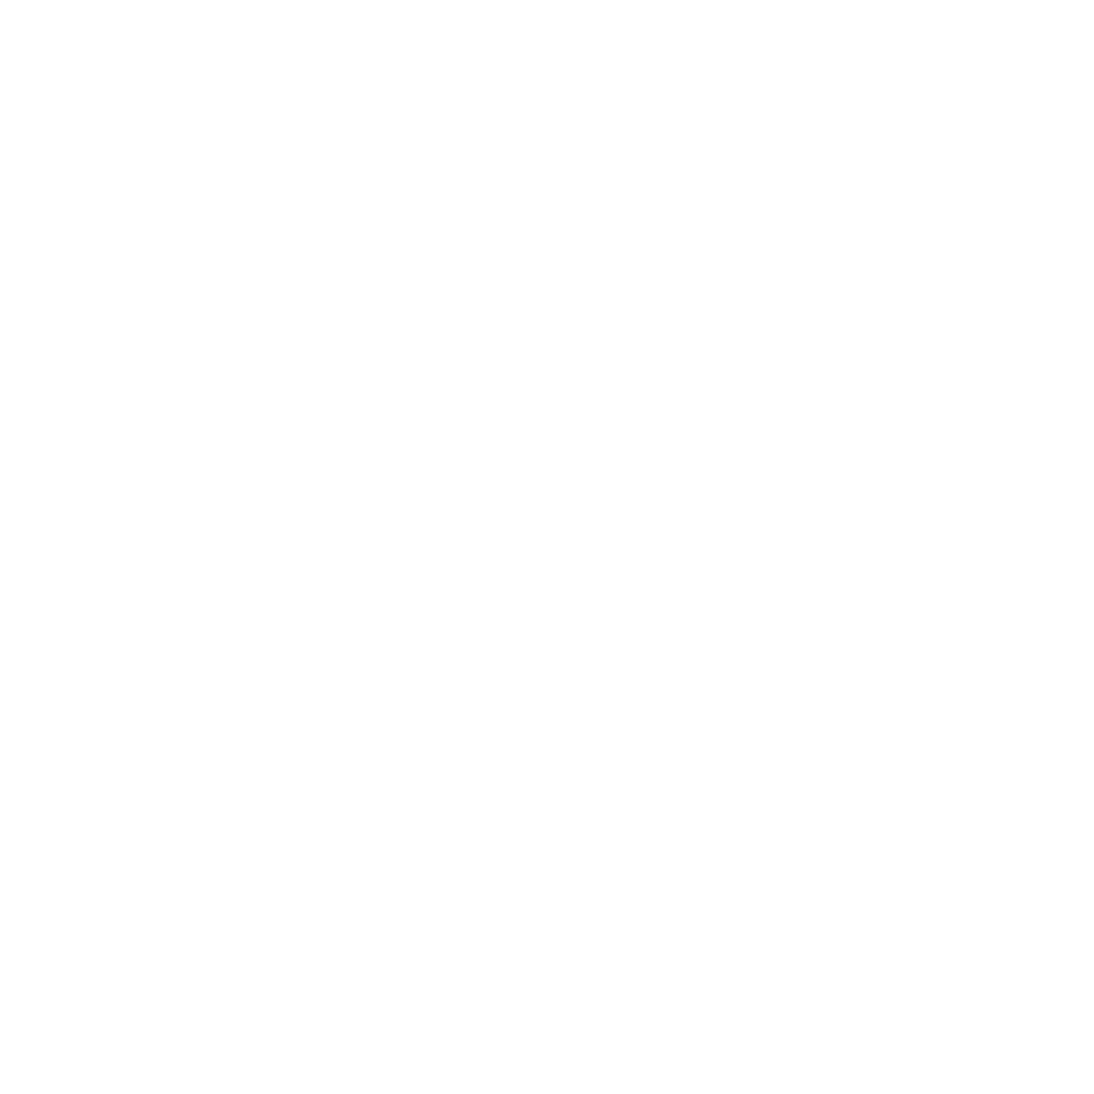

In [81]:
draw_net(G1)